In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False   # - 기호 깨지는 것 방지
# f_path = "/Library/Fonts/AppleGothic.ttf"   -> MAC
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [209]:
df = glob.glob('../../data/dust/*')
df

['../../data/dust\\april_4.csv',
 '../../data/dust\\august_8.csv',
 '../../data/dust\\december_12.csv',
 '../../data/dust\\feburary_2.csv',
 '../../data/dust\\january_1.csv',
 '../../data/dust\\july_7.csv',
 '../../data/dust\\june_6.csv',
 '../../data/dust\\march_3.csv',
 '../../data/dust\\may_5.csv',
 '../../data/dust\\november_11.csv',
 '../../data/dust\\october_10.csv',
 '../../data/dust\\september_9.csv',
 '../../data/dust\\미세먼지 인덱스.txt']

In [210]:
df_all = []
for x in df_all:
    a = pd.read_csv(x, encoding='cp949')
    df_all.append(a)
df_all

[]

In [192]:
df_all_pivot = pd.melt(df_all, id_vars='city')
df_all_pivot

,city,variable,value
0,서울시 평균,X1,2.0
1,종로구,X1,1.0
2,중구,X1,1.0
3,용산구,X1,2.0
4,성동구,X1,2.0
...,...,...,...
9667,관악구,X31,NaN
9668,서초구,X31,NaN
9669,강남구,X31,NaN
9670,송파구,X31,NaN


In [196]:
df_count = df_all_pivot.groupby(['city', 'value']).count().reset_index()
df_count

,city,value,variable
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30
...,...,...,...
99,중구,3.0,19
100,중랑구,0.0,68
101,중랑구,1.0,147
102,중랑구,2.0,130


In [197]:
df_count_value = df_count[df_count['value']<=3.0]
df_count_value

,city,value,variable
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30
...,...,...,...
99,중구,3.0,19
100,중랑구,0.0,68
101,중랑구,1.0,147
102,중랑구,2.0,130


<Axes: xlabel='city', ylabel='variable'>

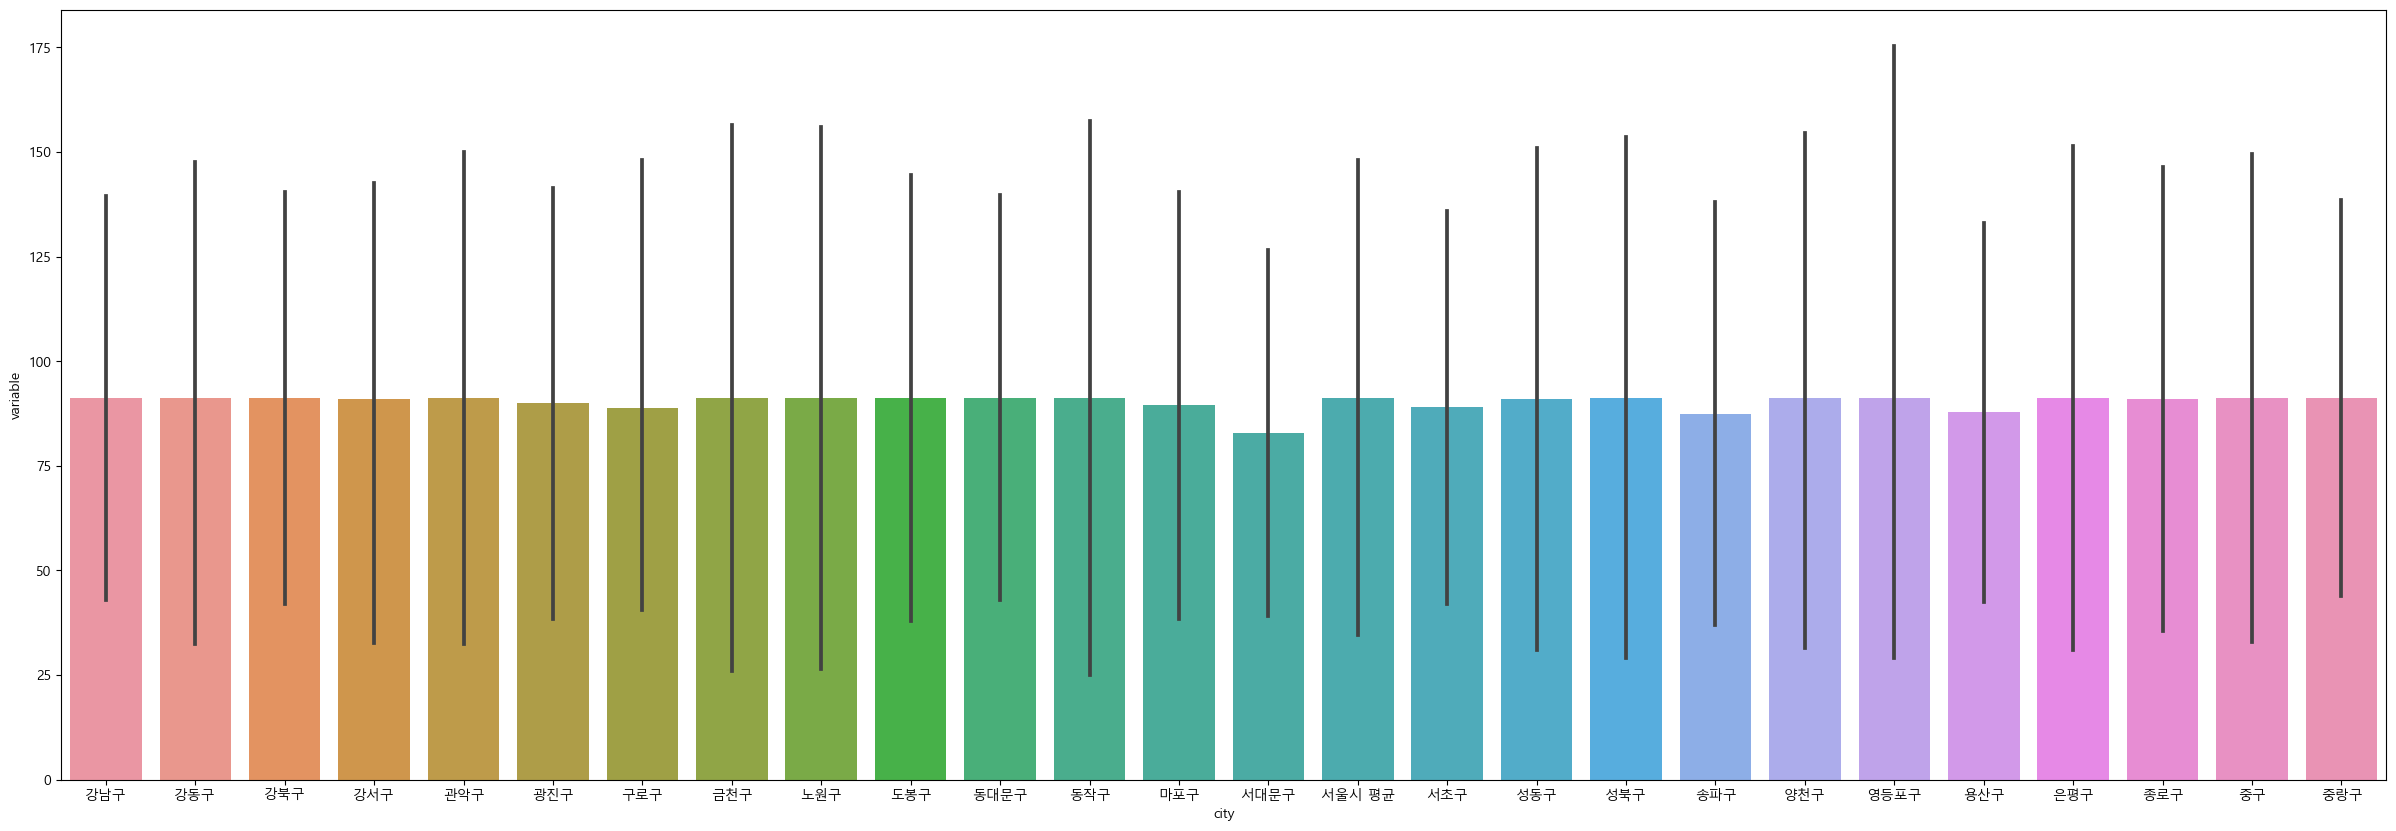

In [206]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x='city', y='variable', data=df_count_value)